In [1]:
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

plt.style.use("ggplot")

# Simple linear regression

## Synthetic data

In [2]:
# Choose true params
a_true = 3
b_true = 6
sigma_true = 2

# Length of data series
n = 100

In [3]:
x = np.linspace(0, 10, n)
y = a_true * x + b_true + np.random.normal(loc=0, scale=sigma_true, size=n)
df = pd.DataFrame({"x": x, "y": y})
df.head()

,x,y
0,0.00000,7.598444
1,0.10101,5.949112
2,0.20202,7.807139
3,0.30303,8.183386
4,0.40404,7.705635


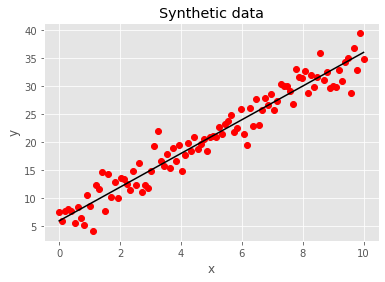

In [4]:
# Plot
fig, ax = plt.subplots()
ax.plot(df["x"], df["y"], "ro")
ax.plot(df["x"], a_true * df["x"] + b_true, "k-")
ax.set_xlabel("x")
ax.set_ylabel("y")
_ = ax.set_title("Synthetic data")

## OLS with `statsmodels`

In [5]:
# See https://www.statsmodels.org/dev/example_formulas.html for formula syntax
# E.g. add "- 1" to the formula if you want to omit the constant
# Also options for categorical vars etc.
mod = smf.ols(formula="y ~ x", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1527.
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.41e-61
Time:                        13:22:00   Log-Likelihood:                -219.29
No. Observations:                 100   AIC:                             442.6
Df Residuals:                      98   BIC:                             447.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3394      0.435     14.580      0.0

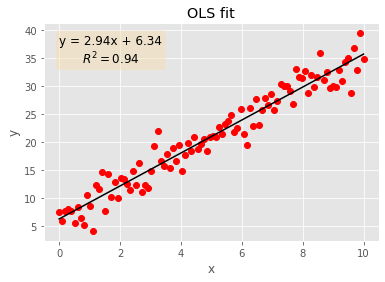

In [6]:
# Basic plot
fig, ax = plt.subplots()
ax.plot(df["x"], df["y"], "ro")
ax.plot(df["x"], res.fittedvalues, "k-")
ax.set_xlabel("x")
ax.set_ylabel("y")
_ = ax.set_title("OLS fit")

# Annotate with result info
slope = res.params["x"]
intcpt = res.params["Intercept"]
r2 = res.rsquared
text = f"y = {slope:.2f}x + {intcpt:.2f}\n" f"$R^2 = {r2:.2f}$"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
_ = ax.text(
    0.2,
    0.95,
    text,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="center",
    bbox=props,
)

## Sen's slope

In [7]:
res_df, sen_df = nivapy.stats.sens_slope(df, index_col="x", value_col="y")
res_df

,description,value
sslp,Median slope estimate,2.955785
icpt,Estimated intercept,6.121363
lb,Lower bound on slope estimate at specified alpha,2.793153
ub,Upper bound on slope estimate at specified alpha,3.09971
trend,Type of trend (if present),increasing


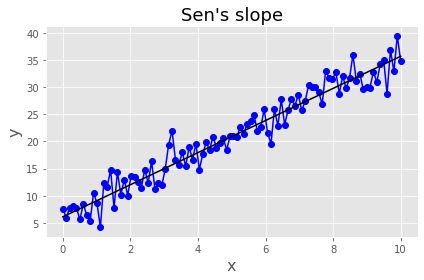

In [8]:
nivapy.plotting.plot_sens_slope(
    res_df, sen_df, xlabel="x", ylabel="y", title="Sen's slope"
)